In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv(r"C:\Users\hc\Documents\GitHub\AI-Q2-learning-resources\DLAssignments\data\Car Price Prediction\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data = df.drop(['car_ID', 'price', 'CarName'], 1)

In [5]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [6]:
data.head(3)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26


In [7]:
data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [8]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

# One Hot Encoding for Categorical Variables

In [9]:
from keras.utils import to_categorical

fueltype_cat = pd.get_dummies(data.fueltype)


aspiration_cat = pd.get_dummies(data.aspiration)


doornumber_cat = pd.get_dummies(data.doornumber)

carbody_cat = pd.get_dummies(data.carbody)


drivewheel_cat = pd.get_dummies(data.drivewheel)

enginelocation_cat = pd.get_dummies(data.enginelocation)

enginetype_cat = pd.get_dummies(data.enginetype)


cylindernumber_cat = pd.get_dummies(data.cylindernumber)

fuelsystem_cat = pd.get_dummies(data.fuelsystem)

Using TensorFlow backend.


In [10]:
# merging all one hot encoded data together

one_hot_encoded_data = pd.concat([fueltype_cat, aspiration_cat, doornumber_cat, carbody_cat, drivewheel_cat, enginelocation_cat, enginetype_cat, cylindernumber_cat, fuelsystem_cat], 1)

one_hot_encoded_data.shape

(205, 38)

In [11]:
# Removing all categorical columns from data

data = data.drop(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], 1)


In [12]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [13]:
targets = df['price']

In [14]:
# 50 percent of 205 = 102
train_data = data.iloc[:102] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:102]

# 20 percent of 205 = 41
validation_data = data.iloc[102: 143]
validation_targets = targets.iloc[102: 143]

# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)

print('VALIDATION')
print(validation_data.shape)
print(validation_targets.shape)
print('#'*15)

print('TEST')
print(test_data.shape)
print(test_targets.shape)

Data, Targets

TRAIN
(102, 14)
(102,)
###############
VALIDATION
(41, 14)
(41,)
###############
TEST
(62, 14)
(62,)


# Normalization (for numerical data --- based on training data)

In [15]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data-=mean
validation_data /= std

test_data-=mean
test_data /= std


# concatenating numerical and one hot encoded data

In [16]:
train_data = pd.concat([train_data, one_hot_encoded_data.iloc[:102]], 1)
validation_data = pd.concat([validation_data, one_hot_encoded_data.iloc[102:143]], 1)
test_data = pd.concat([test_data, one_hot_encoded_data.iloc[143:]], 1)

In [17]:
train_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.889649,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.889649,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.045207,-0.560551,-0.048002,-0.103272,-0.306548,0.555863,0.473876,-2.315518,0.486880,-0.200614,1.338023,-0.464412,-0.878623,-0.647957,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.967428,0.282615,0.345442,0.178163,0.507274,-0.251025,-0.358824,-0.250133,0.207433,0.094194,-0.008632,0.622057,-0.209820,-0.138580,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.967428,0.218980,0.345442,0.258573,0.507274,0.557523,0.164034,-0.250133,0.207433,-0.495423,0.328031,0.622057,-1.012384,-1.157334,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.967428,0.282615,0.396445,0.218368,-0.006719,0.031219,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.045207,1.237142,1.518490,2.268821,1.106933,0.590729,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.045207,1.237142,1.518490,2.268821,1.106933,0.773358,0.164034,-0.250133,0.207433,-0.348018,0.198545,0.622057,-0.878623,-0.775302,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.045207,1.237142,1.518490,2.268821,1.192599,0.992512,0.067208,-0.493120,0.207433,-0.406980,0.975462,0.622057,-1.146144,-1.412023,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9,-0.877014,0.234889,0.462019,0.861648,-0.477879,0.937724,0.067208,-0.493120,0.207433,-0.790231,1.493406,0.622057,-1.279905,-1.157334,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
train_data.shape

(102, 52)

# cross checking shapes

In [19]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 52)
(41, 52)
(62, 52)


In [30]:
# BUILDING MODEL
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                530       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 679
Trainable params: 679
Non-trainable params: 0
_________________________________________________________________


In [32]:
# COMPILING
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [33]:
# FITTING
history = model.fit(train_data, train_targets, epochs=1000, batch_size=32, validation_data= (validation_data, validation_targets))

Train on 102 samples, validate on 41 samples
Epoch 1/1000
102/102 [==============================] - 0s 1ms/step - loss: 280082772.7059 - mae: 13787.9863 - val_loss: 280434760.9756 - val_mae: 14914.8975
Epoch 2/1000
102/102 [==============================] - 0s 88us/step - loss: 280079651.1373 - mae: 13787.8857 - val_loss: 280432223.2195 - val_mae: 14914.8174
Epoch 3/1000
102/102 [==============================] - 0s 225us/step - loss: 280077351.5294 - mae: 13787.8135 - val_loss: 280429382.2439 - val_mae: 14914.7285
Epoch 4/1000
102/102 [==============================] - 0s 69us/step - loss: 280074662.2745 - mae: 13787.7314 - val_loss: 280426502.2439 - val_mae: 14914.6416
Epoch 5/1000
102/102 [==============================] - 0s 69us/step - loss: 280071924.3922 - mae: 13787.6504 - val_loss: 280423280.0000 - val_mae: 14914.5430
Epoch 6/1000
102/102 [==============================] - 0s 78us/step - loss: 280068783.6863 - mae: 13787.5625 - val_loss: 280419114.1463 - val_mae: 14914.4180
E

Epoch 52/1000
102/102 [==============================] - 0s 59us/step - loss: 279394287.5294 - mae: 13768.1172 - val_loss: 279763424.7805 - val_mae: 14893.5020
Epoch 53/1000
102/102 [==============================] - 0s 69us/step - loss: 279361181.6471 - mae: 13767.1377 - val_loss: 279730342.2439 - val_mae: 14892.4355
Epoch 54/1000
102/102 [==============================] - 0s 49us/step - loss: 279324667.9216 - mae: 13766.0879 - val_loss: 279693223.8049 - val_mae: 14891.2422
Epoch 55/1000
102/102 [==============================] - 0s 59us/step - loss: 279284945.4118 - mae: 13764.9521 - val_loss: 279659190.6341 - val_mae: 14890.1445
Epoch 56/1000
102/102 [==============================] - 0s 206us/step - loss: 279246669.1765 - mae: 13763.8066 - val_loss: 279615755.7073 - val_mae: 14888.7617
Epoch 57/1000
102/102 [==============================] - 0s 69us/step - loss: 279200363.2941 - mae: 13762.4941 - val_loss: 279576536.9756 - val_mae: 14887.5020
Epoch 58/1000
102/102 [================

102/102 [==============================] - 0s 59us/step - loss: 275078394.3529 - mae: 13638.7109 - val_loss: 275507941.4634 - val_mae: 14755.9326
Epoch 104/1000
102/102 [==============================] - 0s 69us/step - loss: 274914067.7647 - mae: 13633.7686 - val_loss: 275353530.9268 - val_mae: 14750.9111
Epoch 105/1000
102/102 [==============================] - 0s 69us/step - loss: 274756681.7255 - mae: 13629.0195 - val_loss: 275200853.4634 - val_mae: 14745.9531
Epoch 106/1000
102/102 [==============================] - 0s 59us/step - loss: 274599530.0392 - mae: 13624.2129 - val_loss: 275027010.3415 - val_mae: 14740.3613
Epoch 107/1000
102/102 [==============================] - 0s 59us/step - loss: 274422048.6275 - mae: 13618.9180 - val_loss: 274848569.7561 - val_mae: 14734.6191
Epoch 108/1000
102/102 [==============================] - 0s 59us/step - loss: 274243702.5882 - mae: 13613.5928 - val_loss: 274680135.8049 - val_mae: 14729.1191
Epoch 109/1000
102/102 [=========================

Epoch 154/1000
102/102 [==============================] - 0s 59us/step - loss: 261780836.0784 - mae: 13235.8027 - val_loss: 262179101.6585 - val_mae: 14318.0488
Epoch 155/1000
102/102 [==============================] - 0s 59us/step - loss: 261438805.3333 - mae: 13225.2471 - val_loss: 261745975.0244 - val_mae: 14303.6660
Epoch 156/1000
102/102 [==============================] - 0s 59us/step - loss: 260997953.8824 - mae: 13212.1543 - val_loss: 261307040.3902 - val_mae: 14289.1816
Epoch 157/1000
102/102 [==============================] - 0s 69us/step - loss: 260561817.0980 - mae: 13199.2646 - val_loss: 260908247.0244 - val_mae: 14275.8018
Epoch 158/1000
102/102 [==============================] - 0s 69us/step - loss: 260152564.7059 - mae: 13186.6885 - val_loss: 260492202.1463 - val_mae: 14261.8594
Epoch 159/1000
102/102 [==============================] - 0s 69us/step - loss: 259730719.0588 - mae: 13174.0303 - val_loss: 260073790.0488 - val_mae: 14247.7939
Epoch 160/1000
102/102 [==========

Epoch 205/1000
102/102 [==============================] - 0s 88us/step - loss: 232922649.0980 - mae: 12344.7881 - val_loss: 232670548.4878 - val_mae: 13306.6758
Epoch 206/1000
102/102 [==============================] - 0s 69us/step - loss: 232153559.0588 - mae: 12319.7744 - val_loss: 232021843.9024 - val_mae: 13283.3447
Epoch 207/1000
102/102 [==============================] - 0s 59us/step - loss: 231502209.5686 - mae: 12298.4971 - val_loss: 231311943.4146 - val_mae: 13257.8867
Epoch 208/1000
102/102 [==============================] - 0s 59us/step - loss: 230782648.0000 - mae: 12275.0254 - val_loss: 230589926.2439 - val_mae: 13231.7441
Epoch 209/1000
102/102 [==============================] - 0s 69us/step - loss: 230045727.3725 - mae: 12251.8203 - val_loss: 229721650.1463 - val_mae: 13201.1982
Epoch 210/1000
102/102 [==============================] - 0s 59us/step - loss: 229211954.0392 - mae: 12225.0449 - val_loss: 228937369.9512 - val_mae: 13173.1143
Epoch 211/1000
102/102 [==========

Epoch 256/1000
102/102 [==============================] - 0s 59us/step - loss: 183553284.7843 - mae: 10702.0527 - val_loss: 183195288.5854 - val_mae: 11416.2012
Epoch 257/1000
102/102 [==============================] - 0s 59us/step - loss: 182457880.9412 - mae: 10662.6289 - val_loss: 182008916.2927 - val_mae: 11366.7754
Epoch 258/1000
102/102 [==============================] - 0s 69us/step - loss: 181231901.8039 - mae: 10620.7979 - val_loss: 180787271.0244 - val_mae: 11316.1416
Epoch 259/1000
102/102 [==============================] - 0s 59us/step - loss: 180025808.3137 - mae: 10576.7754 - val_loss: 179747094.2439 - val_mae: 11272.3877
Epoch 260/1000
102/102 [==============================] - 0s 59us/step - loss: 178940274.7843 - mae: 10537.4150 - val_loss: 178674765.6585 - val_mae: 11226.9092
Epoch 261/1000
102/102 [==============================] - 0s 59us/step - loss: 177828028.7843 - mae: 10496.1143 - val_loss: 177492464.5854 - val_mae: 11176.8711
Epoch 262/1000
102/102 [==========

102/102 [==============================] - 0s 59us/step - loss: 114178735.0588 - mae: 7961.7188 - val_loss: 116030232.4878 - val_mae: 8185.4102
Epoch 308/1000
102/102 [==============================] - 0s 49us/step - loss: 112796048.2353 - mae: 7900.9199 - val_loss: 114783567.1220 - val_mae: 8112.3887
Epoch 309/1000
102/102 [==============================] - 0s 98us/step - loss: 111452453.1373 - mae: 7837.1182 - val_loss: 113591028.4878 - val_mae: 8042.4868
Epoch 310/1000
102/102 [==============================] - 0s 88us/step - loss: 110166416.6667 - mae: 7774.4976 - val_loss: 112342338.8293 - val_mae: 7968.5474
Epoch 311/1000
102/102 [==============================] - 0s 59us/step - loss: 108800534.5098 - mae: 7712.0269 - val_loss: 110952252.5854 - val_mae: 7885.3828
Epoch 312/1000
102/102 [==============================] - 0s 78us/step - loss: 107309592.9412 - mae: 7642.1128 - val_loss: 109459951.9024 - val_mae: 7795.4023
Epoch 313/1000
102/102 [==============================] - 0s 

102/102 [==============================] - 0s 59us/step - loss: 44196142.3529 - mae: 4312.6714 - val_loss: 56966435.4390 - val_mae: 4346.6016
Epoch 360/1000
102/102 [==============================] - 0s 59us/step - loss: 43100942.2745 - mae: 4259.0098 - val_loss: 56189654.1463 - val_mae: 4326.6382
Epoch 361/1000
102/102 [==============================] - 0s 167us/step - loss: 41996231.5686 - mae: 4202.1016 - val_loss: 55604518.1220 - val_mae: 4310.7896
Epoch 362/1000
102/102 [==============================] - 0s 59us/step - loss: 41077514.4510 - mae: 4152.2026 - val_loss: 55007359.1463 - val_mae: 4294.4600
Epoch 363/1000
102/102 [==============================] - 0s 69us/step - loss: 40105247.4510 - mae: 4105.3525 - val_loss: 54404732.0976 - val_mae: 4278.1069
Epoch 364/1000
102/102 [==============================] - 0s 59us/step - loss: 39089487.8431 - mae: 4055.5774 - val_loss: 53619944.1829 - val_mae: 4264.5049
Epoch 365/1000
102/102 [==============================] - 0s 69us/step -

102/102 [==============================] - 0s 69us/step - loss: 14981658.9804 - mae: 2869.7197 - val_loss: 51015036.0854 - val_mae: 5284.7817
Epoch 412/1000
102/102 [==============================] - 0s 78us/step - loss: 14844097.2941 - mae: 2857.2346 - val_loss: 51442217.7683 - val_mae: 5340.0601
Epoch 413/1000
102/102 [==============================] - 0s 69us/step - loss: 14719772.8235 - mae: 2849.8137 - val_loss: 51736675.8902 - val_mae: 5378.9297
Epoch 414/1000
102/102 [==============================] - 0s 59us/step - loss: 14617187.1569 - mae: 2840.2822 - val_loss: 51716277.0610 - val_mae: 5382.7866
Epoch 415/1000
102/102 [==============================] - 0s 49us/step - loss: 14537044.0392 - mae: 2831.6206 - val_loss: 52115187.9512 - val_mae: 5434.0708
Epoch 416/1000
102/102 [==============================] - 0s 176us/step - loss: 14426342.1373 - mae: 2820.8726 - val_loss: 52061771.3659 - val_mae: 5431.1851
Epoch 417/1000
102/102 [==============================] - 0s 69us/step -

102/102 [==============================] - 0s 69us/step - loss: 11805549.3578 - mae: 2532.5442 - val_loss: 49987148.4146 - val_mae: 5480.0703
Epoch 464/1000
102/102 [==============================] - 0s 69us/step - loss: 11767717.7647 - mae: 2527.7305 - val_loss: 50343080.3415 - val_mae: 5522.2119
Epoch 465/1000
102/102 [==============================] - 0s 284us/step - loss: 11704417.5490 - mae: 2517.6157 - val_loss: 50013338.7927 - val_mae: 5497.8481
Epoch 466/1000
102/102 [==============================] - 0s 69us/step - loss: 11666457.2549 - mae: 2515.5303 - val_loss: 49556286.2805 - val_mae: 5454.1069
Epoch 467/1000
102/102 [==============================] - 0s 88us/step - loss: 11633596.5490 - mae: 2515.6987 - val_loss: 49949254.8415 - val_mae: 5499.7178
Epoch 468/1000
102/102 [==============================] - 0s 69us/step - loss: 11599821.5686 - mae: 2508.9202 - val_loss: 49729347.0488 - val_mae: 5482.6675
Epoch 469/1000
102/102 [==============================] - 0s 59us/step -

102/102 [==============================] - 0s 69us/step - loss: 9868873.0392 - mae: 2304.3877 - val_loss: 47539864.5488 - val_mae: 5460.8496
Epoch 516/1000
102/102 [==============================] - 0s 69us/step - loss: 9838325.2549 - mae: 2300.3191 - val_loss: 47625615.0732 - val_mae: 5472.4727
Epoch 517/1000
102/102 [==============================] - 0s 69us/step - loss: 9803642.5000 - mae: 2293.6165 - val_loss: 47297872.0732 - val_mae: 5443.1035
Epoch 518/1000
102/102 [==============================] - 0s 59us/step - loss: 9767360.9020 - mae: 2292.4883 - val_loss: 47664409.8902 - val_mae: 5483.9155
Epoch 519/1000
102/102 [==============================] - 0s 69us/step - loss: 9745392.6471 - mae: 2288.3831 - val_loss: 47929264.1951 - val_mae: 5515.6499
Epoch 520/1000
102/102 [==============================] - 0s 59us/step - loss: 9730599.3725 - mae: 2287.7322 - val_loss: 47545501.2195 - val_mae: 5481.2852
Epoch 521/1000
102/102 [==============================] - 0s 69us/step - loss: 

102/102 [==============================] - 0s 69us/step - loss: 8457852.8627 - mae: 2126.4312 - val_loss: 44570435.3659 - val_mae: 5328.6572
Epoch 568/1000
102/102 [==============================] - 0s 69us/step - loss: 8451873.8431 - mae: 2125.4084 - val_loss: 44744419.1707 - val_mae: 5347.7534
Epoch 569/1000
102/102 [==============================] - 0s 69us/step - loss: 8415819.6471 - mae: 2119.0273 - val_loss: 44137994.8659 - val_mae: 5291.3188
Epoch 570/1000
102/102 [==============================] - 0s 59us/step - loss: 8379997.3333 - mae: 2114.7197 - val_loss: 43758653.6585 - val_mae: 5255.3774
Epoch 571/1000
102/102 [==============================] - 0s 59us/step - loss: 8370360.2941 - mae: 2110.5239 - val_loss: 43593616.6098 - val_mae: 5242.2935
Epoch 572/1000
102/102 [==============================] - 0s 59us/step - loss: 8356684.1176 - mae: 2109.3164 - val_loss: 43917202.1707 - val_mae: 5276.0840
Epoch 573/1000
102/102 [==============================] - 0s 78us/step - loss: 

102/102 [==============================] - 0s 59us/step - loss: 7448411.4559 - mae: 1953.0710 - val_loss: 42431003.2927 - val_mae: 5205.4854
Epoch 620/1000
102/102 [==============================] - 0s 147us/step - loss: 7391256.6078 - mae: 1945.9379 - val_loss: 42689728.2561 - val_mae: 5231.4990
Epoch 621/1000
102/102 [==============================] - 0s 69us/step - loss: 7391564.0735 - mae: 1946.3197 - val_loss: 42247453.8780 - val_mae: 5193.3232
Epoch 622/1000
102/102 [==============================] - 0s 59us/step - loss: 7352595.6765 - mae: 1940.4717 - val_loss: 42165305.1463 - val_mae: 5186.0801
Epoch 623/1000
102/102 [==============================] - 0s 69us/step - loss: 7344237.7451 - mae: 1933.9194 - val_loss: 41711078.9756 - val_mae: 5141.7251
Epoch 624/1000
102/102 [==============================] - 0s 59us/step - loss: 7338847.7157 - mae: 1934.4995 - val_loss: 41493235.9268 - val_mae: 5121.0640
Epoch 625/1000
102/102 [==============================] - 0s 69us/step - loss:

102/102 [==============================] - 0s 216us/step - loss: 6504954.8468 - mae: 1774.6663 - val_loss: 40461561.8049 - val_mae: 5059.0127
Epoch 672/1000
102/102 [==============================] - 0s 69us/step - loss: 6515308.3824 - mae: 1771.5713 - val_loss: 40511030.4512 - val_mae: 5061.6035
Epoch 673/1000
102/102 [==============================] - 0s 59us/step - loss: 6466520.2059 - mae: 1763.9137 - val_loss: 40453349.0000 - val_mae: 5055.7114
Epoch 674/1000
102/102 [==============================] - 0s 59us/step - loss: 6467290.6446 - mae: 1765.3159 - val_loss: 40227086.6951 - val_mae: 5034.0288
Epoch 675/1000
102/102 [==============================] - 0s 118us/step - loss: 6443860.8235 - mae: 1758.8757 - val_loss: 39782792.1098 - val_mae: 4992.1152
Epoch 676/1000
102/102 [==============================] - 0s 69us/step - loss: 6436103.0588 - mae: 1753.3955 - val_loss: 40192636.2439 - val_mae: 5030.7646
Epoch 677/1000
102/102 [==============================] - 0s 59us/step - loss

102/102 [==============================] - 0s 78us/step - loss: 5738566.8186 - mae: 1607.2053 - val_loss: 38370422.0488 - val_mae: 4863.1069
Epoch 724/1000
102/102 [==============================] - 0s 69us/step - loss: 5735003.1078 - mae: 1604.0620 - val_loss: 37901932.0732 - val_mae: 4813.8701
Epoch 725/1000
102/102 [==============================] - 0s 69us/step - loss: 5735123.4681 - mae: 1601.1227 - val_loss: 37841048.3720 - val_mae: 4809.0400
Epoch 726/1000
102/102 [==============================] - 0s 69us/step - loss: 5727800.7059 - mae: 1597.6041 - val_loss: 38283481.5671 - val_mae: 4856.6328
Epoch 727/1000
102/102 [==============================] - 0s 69us/step - loss: 5698642.5882 - mae: 1598.7394 - val_loss: 37872900.9024 - val_mae: 4813.7100
Epoch 728/1000
102/102 [==============================] - 0s 69us/step - loss: 5686992.2745 - mae: 1592.3434 - val_loss: 38091138.2622 - val_mae: 4837.3853
Epoch 729/1000
102/102 [==============================] - 0s 69us/step - loss: 

102/102 [==============================] - 0s 108us/step - loss: 5221115.3725 - mae: 1495.1467 - val_loss: 35273085.6829 - val_mae: 4559.5923
Epoch 776/1000
102/102 [==============================] - 0s 59us/step - loss: 5184546.1814 - mae: 1490.9554 - val_loss: 35272466.0244 - val_mae: 4561.6519
Epoch 777/1000
102/102 [==============================] - 0s 59us/step - loss: 5187741.5686 - mae: 1485.7463 - val_loss: 35848980.2683 - val_mae: 4626.2153
Epoch 778/1000
102/102 [==============================] - 0s 59us/step - loss: 5159215.9681 - mae: 1488.4293 - val_loss: 35960127.8902 - val_mae: 4638.6426
Epoch 779/1000
102/102 [==============================] - 0s 69us/step - loss: 5160159.9191 - mae: 1487.7745 - val_loss: 35892201.9512 - val_mae: 4629.9199
Epoch 780/1000
102/102 [==============================] - 0s 69us/step - loss: 5156068.8235 - mae: 1483.5852 - val_loss: 36240754.5488 - val_mae: 4668.4263
Epoch 781/1000
102/102 [==============================] - 0s 98us/step - loss:

102/102 [==============================] - 0s 69us/step - loss: 4786807.9020 - mae: 1415.2982 - val_loss: 33419537.6463 - val_mae: 4385.8027
Epoch 828/1000
102/102 [==============================] - 0s 69us/step - loss: 4780333.5490 - mae: 1413.3306 - val_loss: 33448265.8476 - val_mae: 4387.7812
Epoch 829/1000
102/102 [==============================] - 0s 78us/step - loss: 4772180.2549 - mae: 1412.6323 - val_loss: 33044811.9512 - val_mae: 4344.0669
Epoch 830/1000
102/102 [==============================] - 0s 78us/step - loss: 4765901.9020 - mae: 1410.8992 - val_loss: 33040342.1890 - val_mae: 4343.1152
Epoch 831/1000
102/102 [==============================] - 0s 69us/step - loss: 4756348.9387 - mae: 1410.0437 - val_loss: 33064654.2866 - val_mae: 4343.9019
Epoch 832/1000
102/102 [==============================] - 0s 78us/step - loss: 4753190.2475 - mae: 1408.1584 - val_loss: 33109459.3963 - val_mae: 4347.9258
Epoch 833/1000
102/102 [==============================] - 0s 69us/step - loss: 

102/102 [==============================] - 0s 69us/step - loss: 4447160.3480 - mae: 1355.5470 - val_loss: 31749528.3628 - val_mae: 4238.3115
Epoch 880/1000
102/102 [==============================] - 0s 69us/step - loss: 4452151.6176 - mae: 1355.7731 - val_loss: 32211202.2195 - val_mae: 4288.1016
Epoch 881/1000
102/102 [==============================] - 0s 59us/step - loss: 4432112.4118 - mae: 1354.0110 - val_loss: 32249805.7805 - val_mae: 4292.6934
Epoch 882/1000
102/102 [==============================] - 0s 78us/step - loss: 4451889.1250 - mae: 1354.3989 - val_loss: 32138859.7439 - val_mae: 4281.2622
Epoch 883/1000
102/102 [==============================] - 0s 78us/step - loss: 4417730.4289 - mae: 1350.9222 - val_loss: 31825516.4848 - val_mae: 4251.1934
Epoch 884/1000
102/102 [==============================] - 0s 59us/step - loss: 4421881.4608 - mae: 1351.7787 - val_loss: 31544966.4970 - val_mae: 4220.7485
Epoch 885/1000
102/102 [==============================] - 0s 59us/step - loss: 

102/102 [==============================] - 0s 59us/step - loss: 4201055.8529 - mae: 1310.4933 - val_loss: 30476284.9177 - val_mae: 4134.5234
Epoch 932/1000
102/102 [==============================] - 0s 49us/step - loss: 4205262.5098 - mae: 1311.3174 - val_loss: 30929838.0152 - val_mae: 4180.0977
Epoch 933/1000
102/102 [==============================] - 0s 59us/step - loss: 4217458.9792 - mae: 1312.4944 - val_loss: 30959233.6128 - val_mae: 4183.0000
Epoch 934/1000
102/102 [==============================] - 0s 88us/step - loss: 4182950.8162 - mae: 1307.7499 - val_loss: 30901072.5290 - val_mae: 4178.0005
Epoch 935/1000
102/102 [==============================] - 0s 59us/step - loss: 4175452.9044 - mae: 1303.5491 - val_loss: 30964618.4451 - val_mae: 4186.2559
Epoch 936/1000
102/102 [==============================] - 0s 59us/step - loss: 4180221.2794 - mae: 1305.8148 - val_loss: 30809103.9284 - val_mae: 4172.5713
Epoch 937/1000
102/102 [==============================] - 0s 59us/step - loss: 

102/102 [==============================] - 0s 59us/step - loss: 3978496.7610 - mae: 1272.1355 - val_loss: 29867705.2271 - val_mae: 4116.6655
Epoch 984/1000
102/102 [==============================] - 0s 69us/step - loss: 3993430.4706 - mae: 1271.5635 - val_loss: 30111732.1692 - val_mae: 4141.6079
Epoch 985/1000
102/102 [==============================] - 0s 59us/step - loss: 4003890.7733 - mae: 1275.3760 - val_loss: 30065712.3460 - val_mae: 4137.1162
Epoch 986/1000
102/102 [==============================] - 0s 78us/step - loss: 3977968.7328 - mae: 1272.6835 - val_loss: 29974771.1204 - val_mae: 4127.9004
Epoch 987/1000
102/102 [==============================] - 0s 59us/step - loss: 3982418.0429 - mae: 1270.4058 - val_loss: 29793373.2424 - val_mae: 4111.5996
Epoch 988/1000
102/102 [==============================] - 0s 69us/step - loss: 3984069.6765 - mae: 1272.3346 - val_loss: 30141929.7744 - val_mae: 4146.9331
Epoch 989/1000
102/102 [==============================] - 0s 59us/step - loss: 

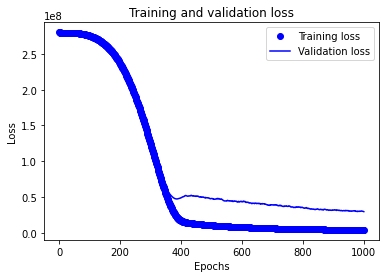

In [34]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
history.history['val_loss'][-5:]

[30105956.352134146,
 29961755.528963413,
 29864878.408536587,
 29648671.335365854,
 29498762.701219514]

In [ ]:
train_data.columns